# Estrellas para la detección de exoplanetas

1) Utilizando los archivos fits, indique cual de las  siguientes estrellas poseen exoplanetas, justifique sus respuestas.

*   TIC 172900988
*   TIC 393818343
*   TIC 290131778
*   TIC 22567172
*   TIC 439967669
*   TIC 237913194

2) Utilizando los datos en linea y con ayuda del paquete lightkurve, determine cual las siguientes estrellas poseen exoplanetas, justifique sus respuestas.

* KIC 11446443
* KIC 10874614
* KIC 11804465
* KIC 10925104
* KIC 10264660
* KIC 5090690


3) Utilice el catalogo MAST y escoga 10 estrellas que esten bajo el criterio:

* T_eff = Temperature between 2000 and 3500
* Distance = Between 12 and 24 parsecs
* Magnitud: V < 14 (más brillantes = mejor calidad de datos).

E identifique y explique si a estas estrellas se les puede adjudicar o no un exoplaneta.

4) No olvide responder las preguntas que se planteen en clase.


In [12]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
print(lk.__version__)

2.5.1


In [18]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

product_group_id = '71240519'
url = 'https://mast.stsci.edu/api/v0.1/Download/bundle.zip?previews=false&obsid=' + product_group_id
destination = '/TESS/'
#destination = '/KEPLER/'

download_and_unzip(url, destination)


## TIC 172900988

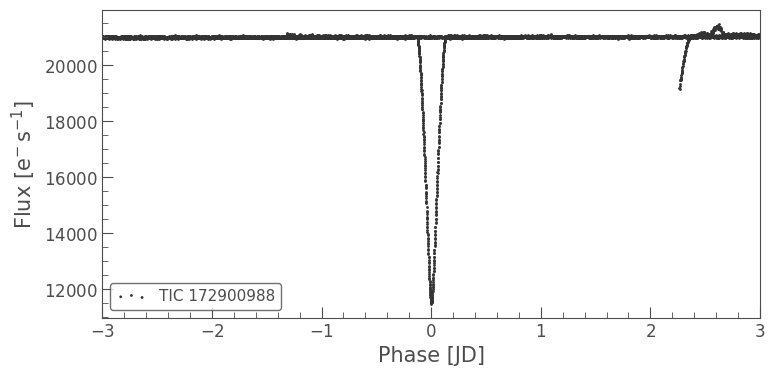

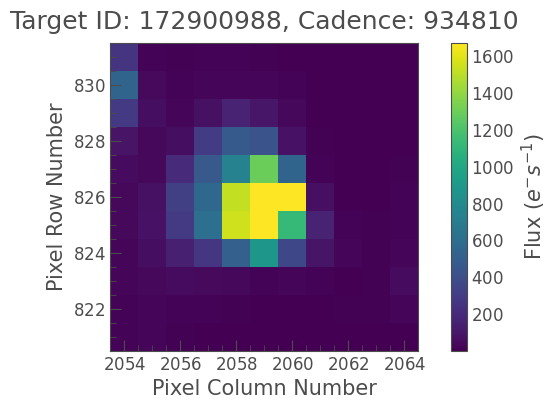

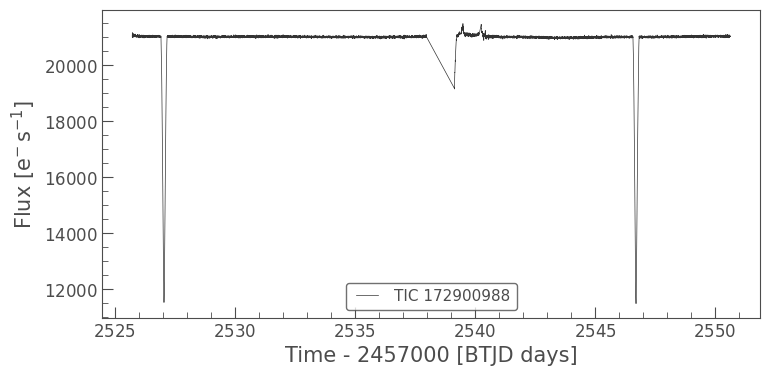

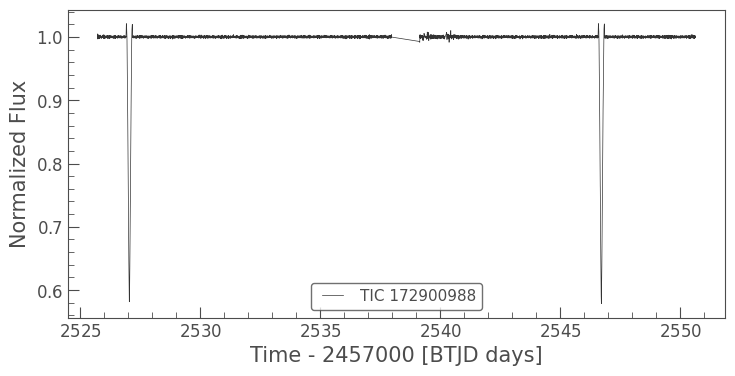

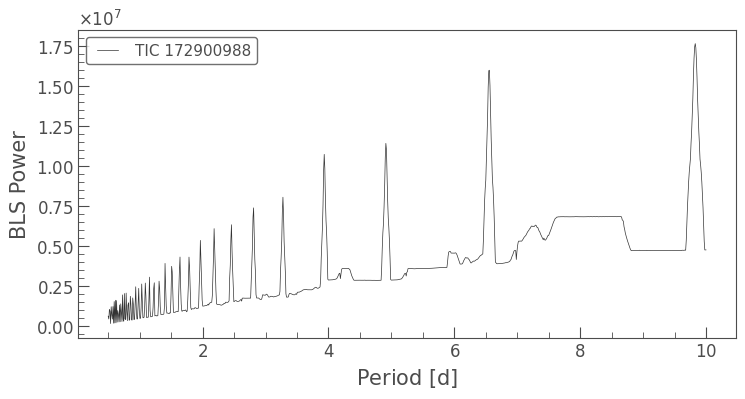

9.82882882882883 d
2527.0511084170703
0.15 d


In [19]:
# Let's download the pixelfile for a given star
# And save it to a local folder (See download helper below)

# Command to search for file - often is not available, so that's why we download more manually
# pixelFile = search_targetpixelfile('KIC 6922244', author="TESS", cadence="long", quarter=4).download()

tpf = TessTargetPixelFile("C:\\TESS\\MAST_2025-09-18T1647\\TESS\\tess2021310001228-s0045-0000000172900988-0216-s\\tess2021310001228-s0045-0000000172900988-0216-s_tp.fits")
# Show a single snapshot
tpf.plot(frame=42)
plt.show()

# Plot the lightcurve
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()
plt.show()

# Flatten it
flat_lc = lc.flatten()
flat_lc.plot()
plt.show()

# Try and find the period of the most prominent orbiting object
period = np.linspace(0.5, 10, 1000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()
plt.show()

planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

# Phase-fold the ligthcurve based on the discovered period at max power
ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-3,3)

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)